# 040.Simple Train / Test Split

- 일정 비율로 data 분할 (ex. 80 : 20)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the diabetes dataset
# 나이, 성별, 체질량지수, 혈압, 6가지 혈청 수치
diabetes = datasets.load_diabetes()
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
df_diab  = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [4]:
df_diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
X = df_diab.values
X.shape

(442, 10)

In [6]:
y = diabetes.target
y.shape

(442,)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print(X_train.shape)
print(y_train.shape)
print()
print(X_test.shape)
print(y_test.shape)

(353, 10)
(353,)

(89, 10)
(89,)


In [9]:
# regression object 생성
lm = linear_model.LinearRegression()

# training set 을 이용하여 model 훈련
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# testing set 을 이용한 예측
y_pred = lm.predict(X_test)

# MSE(mean squared error) 
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
# R2 
print("Variance score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 2806.25
Variance score: 0.53


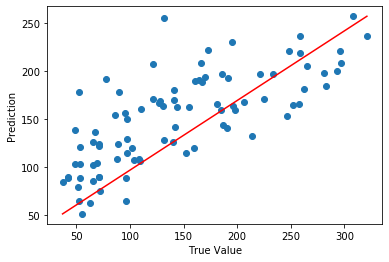

In [11]:
# visualization
plt.scatter(y_test,  y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], c='r')

plt.xlabel('True Value') 
plt.ylabel('Prediction')
plt.show()

# K-Fold Validation

- data 가 적은 경우 사용

- data 가 충분하더라도 training 중 과적합을 방지하려는 경우 사용

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [23]:
lm = linear_model.LinearRegression()
lm.fit(X, y)

scores = cross_val_score(lm, X, y, cv=6)

print("cross validation scores : ", scores)
print("cross validation mean scores : {:.2f}".format(scores.mean()))

cross validation scores :  [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]
cross validation mean scores : 0.48


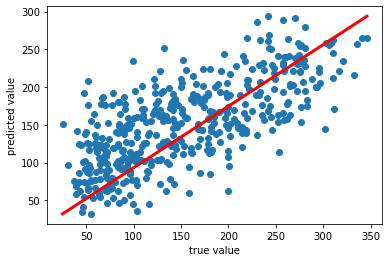

In [24]:
y_pred = cross_val_predict(lm, X, y, cv=6)

plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], c='r', lw=3)

plt.xlabel('true value')
plt.ylabel('predicted value')
None

In [25]:
# MSE(mean squared error) 
print("Mean squared error: {:.2f}".format(mean_squared_error(y, y_pred)))
# R2 
print("Variance score: {:.2f}".format(r2_score(y, y_pred)))

Mean squared error: 3019.46
Variance score: 0.49
